In [22]:
using Slepians, Plots, FFTW, IterTools, KernelMatrices, KrylovKit

In [23]:
include("customsleps.jl")

customsleps

In [24]:
M = 5
Kp = 6.0
szx, szy = szs = (64,64)
hsx, hsy = (Int64(szx/2), Int64(szy/2))
exact = true


s, slep = customsleps(M, Kp, szs, exact = exact);
SLEP = map(slp -> real.(abs2.(fftshift(fft(slp)))), slep);

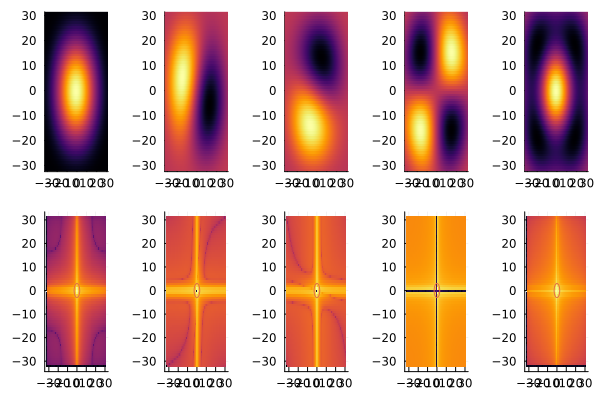

In [25]:
h1 = Array{Plots.Plot{Plots.GRBackend},1}(undef, M)
h2 = Array{Plots.Plot{Plots.GRBackend},1}(undef, M)
t  = LinRange(0, 1, 40)

for i = 1:M
    h1[i] = heatmap(-hsx:(hsx-1),-hsy:(hsy-1), real.(slep[i]))
    h2[i] = heatmap(-hsx:(hsx-1),-hsy:(hsy-1),log10.(SLEP[i]))
    plot!(h2[i], Kp/2*cos.(2*pi*t), Kp/2*sin.(2*pi*t))
end

plot(h1..., h2..., layout = (2,M), colorbar = false, legend = false)

In [26]:
# Maybe just use the Geoga (2018) toy example
Nx = 64
dom_size = 64.0
Nt = 64
duration = 64.0

dx = dom_size/Nx
dt = duration/Nt
Fx = 1.0/dx
Ft = 1.0/dt

n = LinRange(0,duration,Nt)
k = LinRange(0,dom_size,Nx)

k_0 = [1.2,-12.5]/dom_size
omega_0 = [8.0,14.0]/duration
phs = pi/3

# Rows are space, Columns are time

x = cos.(2*pi*collect(k)*k_0[1]).*cos.(2*pi*transpose(n)*omega_0[1].+phs) # Standing
y = cos.(2*pi*repeat(collect(k),1,length(n))*k_0[2] .+ 2*pi*omega_0[2]*repeat(transpose(n),length(k),1)) # Traveling
noize = randn(Nx,Nt)

z = x + y + noize;


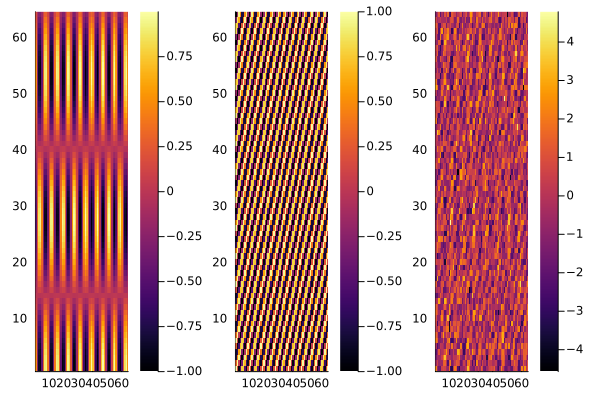

In [27]:
plot(heatmap(x), heatmap(y), heatmap(z), layout = (1,3), figsize = (1200, 300))

In [28]:
Sx = map(slp -> real.(abs2.(fftshift(fft(slp.*z)))), slep);

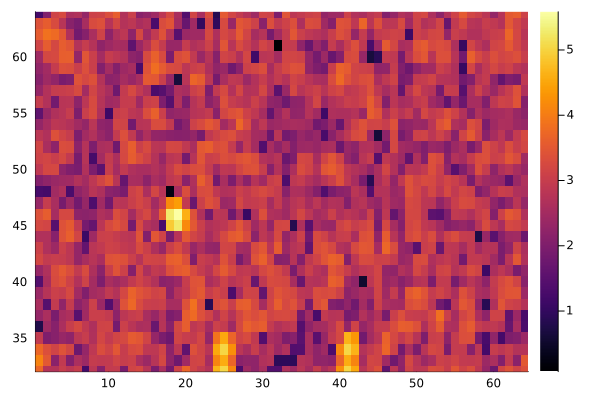

In [29]:
# Here is a single taper estimate

heatmap(log10.(Sx[1]), ylims = [32, 64])